In [1]:
import pandas as pd
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [2]:
df1=pd.read_csv("/content/customer_data.csv")
df1.head()

label        id  fea_1   fea_2  fea_3     fea_4  fea_5  fea_6  fea_7  \
0      1  54982665      5  1245.5      3   77000.0      2     15      5   
1      0  59004779      4  1277.0      1  113000.0      2      8     -1   
2      0  58990862      7  1298.0      1  110000.0      2     11     -1   
3      1  58995168      7  1335.5      1  151000.0      2     11      5   
4      0  54987320      7     NaN      2   59000.0      2     11      5   

   fea_8  fea_9  fea_10      fea_11  
0    109      5  151300  244.948974  
1    100      3  341759  207.173840  
2    101      5   72001    1.000000  
3    110      3   60084    1.000000  
4    108      4  450081  197.403141

In [3]:
df2=pd.read_csv("/content/payment_data.csv")
df2.head()

id  OVD_t1  OVD_t2  OVD_t3  OVD_sum  pay_normal  prod_code  \
0  58987402       0       0       0        0           1         10   
1  58995151       0       0       0        0           1          5   
2  58997200       0       0       0        0           2          5   
3  54988608       0       0       0        0           3         10   
4  54987763       0       0       0        0           2         10   

   prod_limit update_date  new_balance  highest_balance report_date  
0     16500.0  04/12/2016          0.0              NaN         NaN  
1         NaN  04/12/2016     588720.0         491100.0         NaN  
2         NaN  04/12/2016     840000.0         700500.0  22/04/2016  
3     37400.0  03/12/2016       8425.2           7520.0  25/04/2016  
4         NaN  03/12/2016      15147.6              NaN  26/04/2016

In [4]:
df1.shape

(1125, 13)

In [5]:
df2.shape

(8250, 12)

In [6]:
df1.isnull().sum()

label       0
id          0
fea_1       0
fea_2     149
fea_3       0
fea_4       0
fea_5       0
fea_6       0
fea_7       0
fea_8       0
fea_9       0
fea_10      0
fea_11      0
dtype: int64

In [7]:
df=pd.DataFrame(df1)

In [8]:
df_cleaned=df.dropna(axis=0,inplace=True)

In [9]:
df_cleaned

In [10]:
df.isnull().sum()

label     0
id        0
fea_1     0
fea_2     0
fea_3     0
fea_4     0
fea_5     0
fea_6     0
fea_7     0
fea_8     0
fea_9     0
fea_10    0
fea_11    0
dtype: int64

In [11]:
df2.isnull().sum()

id                    0
OVD_t1                0
OVD_t2                0
OVD_t3                0
OVD_sum               0
pay_normal            0
prod_code             0
prod_limit         6118
update_date          26
new_balance           0
highest_balance     409
report_date        1114
dtype: int64

In [12]:
data=pd.DataFrame(df2)

In [13]:
data_cleaned=data.dropna(axis=0,inplace=True)

In [14]:
data_cleaned

In [15]:
data.isnull().sum()

id                 0
OVD_t1             0
OVD_t2             0
OVD_t3             0
OVD_sum            0
pay_normal         0
prod_code          0
prod_limit         0
update_date        0
new_balance        0
highest_balance    0
report_date        0
dtype: int64

In [16]:
df.describe()

label            id       fea_1        fea_2       fea_3  \
count  976.000000  9.760000e+02  976.000000   976.000000  976.000000   
mean     0.192623  5.785697e+07    5.519467  1283.911373    2.364754   
std      0.394562  1.807623e+06    1.381797    51.764022    0.930480   
min      0.000000  5.498235e+07    1.000000  1116.500000    1.000000   
25%      0.000000  5.499055e+07    4.000000  1244.000000    1.000000   
50%      0.000000  5.898971e+07    5.000000  1281.500000    3.000000   
75%      0.000000  5.899789e+07    7.000000  1314.500000    3.000000   
max      1.000000  5.900624e+07    7.000000  1481.000000    3.000000   

              fea_4       fea_5       fea_6       fea_7       fea_8  \
count  9.760000e+02  976.000000  976.000000  976.000000  976.000000   
mean   1.253709e+05    1.928279   10.920082    4.899590  100.366803   
std    9.056357e+04    0.258158    2.664056    2.885891   12.097751   
min    1.500000e+04    1.000000    3.000000   -1.000000   64.000000   
25%    7.600000e+04    2.000000    8.000000    5.000000   90.000000   
50%    1.060000e+05    2.000000   11.000000    5.000000  104.000000   
75%    1.430000e+05    2.000000   11.000000    5.000000  110.000000   
max    1.200000e+06    2.000000   15.000000   10.000000  115.000000   

            fea_9         fea_10      fea_11  
count  976.000000     976.000000  976.000000  
mean     4.206967  161307.911885  130.742740  
std      0.868947  150373.596241  117.483572  
min      1.000000   60000.000000    1.000000  
25%      3.000000   60043.000000    1.000000  
50%      4.000000   72000.000000  173.205081  
75%      5.000000  151304.000000  204.939015  
max      5.000000  650018.000000  707.106781

In [17]:
merged=pd.merge(df1,df2,on='id')

In [18]:
merged

label        id  fea_1   fea_2  fea_3     fea_4  fea_5  fea_6  fea_7  \
0         1  54982665      5  1245.5      3   77000.0      2     15      5   
1         1  54982665      5  1245.5      3   77000.0      2     15      5   
2         1  54982665      5  1245.5      3   77000.0      2     15      5   
3         1  54982665      5  1245.5      3   77000.0      2     15      5   
4         0  59004779      4  1277.0      1  113000.0      2      8     -1   
...     ...       ...    ...     ...    ...       ...    ...    ...    ...   
8245      0  58998054      4  1250.0      3  137000.0      2      8      5   
8246      0  58998054      4  1250.0      3  137000.0      2      8      5   
8247      0  54989781      4  1415.0      3   93000.0      2      8      5   
8248      0  54989781      4  1415.0      3   93000.0      2      8      5   
8249      0  54989781      4  1415.0      3   93000.0      2      8      5   

      fea_8  ...  OVD_t2  OVD_t3  OVD_sum  pay_normal  prod_code  prod_limit  \
0       109  ...       0       0        0           9         10     60500.0   
1       109  ...       0       0        0          18         10         NaN   
2       109  ...       0       0        0           1          5         NaN   
3       109  ...       2      26    11906           6         10         NaN   
4       100  ...       0       0        0           4          6         NaN   
...     ...  ...     ...     ...      ...         ...        ...         ...   
8245     90  ...       0       0        0          10         13         NaN   
8246     90  ...       0       0        0           1         10         NaN   
8247    113  ...       0       0        0          12          2         NaN   
8248    113  ...       0       0        0           7          1         NaN   
8249    113  ...       0       0        0          33         10         NaN   

      update_date  new_balance  highest_balance  report_date  
0      31/01/2015       6657.6          18934.0   19/09/2015  
1      28/04/2009     153792.0         149387.0   10/08/2015  
2      30/03/2009          0.0         150500.0          NaN  
3      17/05/2007          0.0          46371.0   12/07/2013  
4      02/06/2016      15120.0          21500.0   19/04/2016  
...           ...          ...              ...          ...  
8245   06/04/2010          0.0          35500.0   06/03/2011  
8246   27/04/2008       -121.2            601.0          NaN  
8247   01/12/2015     334130.4        2400500.0   12/01/2015  
8248   18/07/2015     456098.4         406938.0   22/12/2015  
8249   17/05/2013       8391.6          36149.0   16/01/2016  

[8250 rows x 24 columns]

In [19]:
merged.value_counts

<bound method DataFrame.value_counts of       label        id  fea_1   fea_2  fea_3     fea_4  fea_5  fea_6  fea_7  \
0         1  54982665      5  1245.5      3   77000.0      2     15      5   
1         1  54982665      5  1245.5      3   77000.0      2     15      5   
2         1  54982665      5  1245.5      3   77000.0      2     15      5   
3         1  54982665      5  1245.5      3   77000.0      2     15      5   
4         0  59004779      4  1277.0      1  113000.0      2      8     -1   
...     ...       ...    ...     ...    ...       ...    ...    ...    ...   
8245      0  58998054      4  1250.0      3  137000.0      2      8      5   
8246      0  58998054      4  1250.0      3  137000.0      2      8      5   
8247      0  54989781      4  1415.0      3   93000.0      2      8      5   
8248      0  54989781      4  1415.0      3   93000.0      2      8      5   
8249      0  54989781      4  1415.0      3   93000.0      2      8      5   

      fea_8  ...  OVD_t

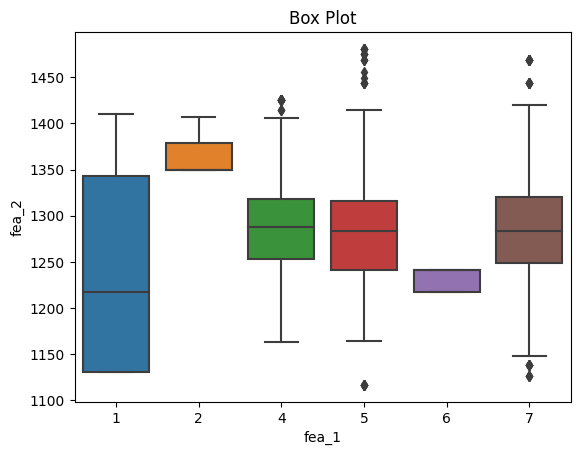

In [20]:
sns.boxplot(data=merged,x="fea_1",y="fea_2")
plt.title('Box Plot')
plt.show()

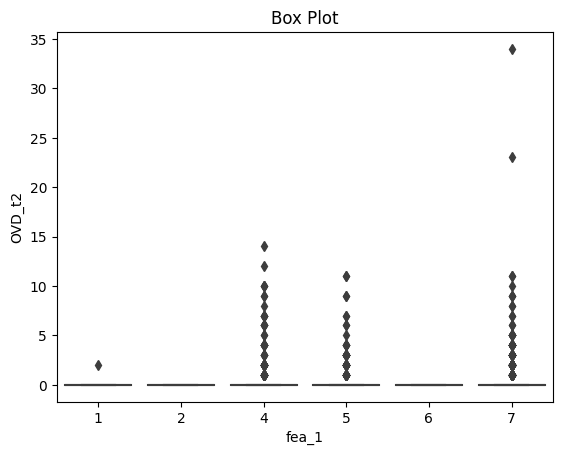

In [21]:
sns.boxplot(data=merged,x='fea_1',y='OVD_t2')
plt.title('Box Plot')
plt.show()

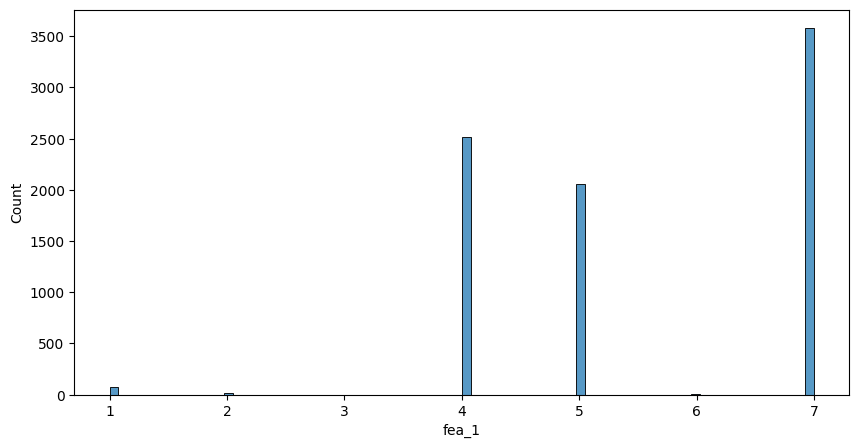

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(merged['fea_1'],bins=80)
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [24]:
features = ['OVD_t1', 'OVD_t2', 'OVD_t3', 'OVD_sum', 'pay_normal', 'prod_limit', 'fea_1', 'fea_3', 'fea_5', 'fea_6', 'fea_7', 'fea_9']
target = 'label'

In [25]:
X = merged[features]
y = merged[target]


In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [27]:
data = df2.merge(df1, on='id', how='inner')


In [28]:
data['update_date'] = (pd.to_datetime(data['update_date']) - pd.Timestamp("2000-01-01")).dt.days
data['report_date'] = (pd.to_datetime(data['report_date']) - pd.Timestamp("2000-01-01")).dt.days


<ipython-input-28-3064fb0400d4>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['update_date'] = (pd.to_datetime(data['update_date']) - pd.Timestamp("2000-01-01")).dt.days
<ipython-input-28-3064fb0400d4>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['report_date'] = (pd.to_datetime(data['report_date']) - pd.Timestamp("2000-01-01")).dt.days


In [29]:
features = ['OVD_t1', 'OVD_t2', 'OVD_t3', 'OVD_sum', 'pay_normal','fea_1', 'fea_3', 'fea_5', 'fea_6', 'fea_7', 'fea_9']
target = 'label'

In [30]:
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression()

model.fit(X_train_scaled, y_train)


predictions = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.823030303030303
Confusion Matrix:
 [[1358    1]
 [ 291    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90      1359
           1       0.00      0.00      0.00       291

    accuracy                           0.82      1650
   macro avg       0.41      0.50      0.45      1650
weighted avg       0.68      0.82      0.74      1650



In [31]:
model=RandomForestClassifier(n_estimators=100, random_state=42)

In [32]:
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [33]:
predictions=model.predict(X_test)
predictions

array([0, 0, 1, ..., 0, 0, 0])

In [34]:
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.816969696969697
Confusion Matrix:
 [[1300   59]
 [ 243   48]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90      1359
           1       0.45      0.16      0.24       291

    accuracy                           0.82      1650
   macro avg       0.65      0.56      0.57      1650
weighted avg       0.77      0.82      0.78      1650



In [35]:
df2 = pd.read_csv('/content/payment_data.csv')
df1 = pd.read_csv('/content/customer_data.csv')
data = pd.merge(df2, df1, on='id')


In [36]:
features = ['OVD_t1', 'OVD_t2', 'OVD_t3', 'OVD_sum', 'pay_normal','fea_1', 'fea_3', 'fea_5', 'fea_6', 'fea_7', 'fea_9']
target = 'label'

In [37]:
X = merged[features]
y = merged[target]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [40]:
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)



In [41]:
svm_classifier.fit(X_train_scaled, y_train)


SVC(kernel='linear', random_state=42)

In [42]:
y_pred = svm_classifier.predict(X_test_scaled)
y_pred


array([0, 0, 0, ..., 0, 0, 0])

In [43]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1384
           1       0.00      0.00      0.00       266

    accuracy                           0.84      1650
   macro avg       0.42      0.50      0.46      1650
weighted avg       0.70      0.84      0.77      1650



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report



In [45]:
df2 = pd.read_csv('/content/payment_data.csv')
df1 = pd.read_csv('/content/customer_data.csv')
data = pd.merge(df1, df2, on='id')



In [46]:
features = ['OVD_t1', 'OVD_t2', 'OVD_t3', 'OVD_sum', 'pay_normal','fea_1', 'fea_3', 'fea_5', 'fea_6', 'fea_7', 'fea_9']
target = 'label'

In [47]:
X = merged[features]
y = merged['label']

In [48]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)


In [49]:
random_forest.fit(X_train_scaled, y_train)
gradient_boosting.fit(X_train_scaled, y_train)


GradientBoostingClassifier(random_state=42)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy}")


Accuracy: 0.813939393939394


In [52]:
features = ['OVD_t1', 'OVD_t2', 'OVD_t3', 'OVD_sum', 'pay_normal','fea_1', 'fea_3', 'fea_5', 'fea_6', 'fea_7', 'fea_9']
target = 'label'

In [53]:
X = merged[features]
y = merged['label']

In [54]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [55]:
from sklearn.cluster import KMeans


In [56]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

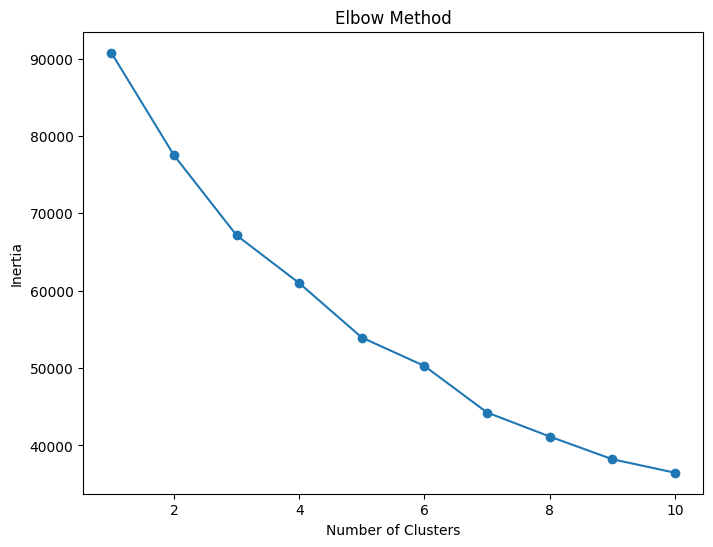

In [57]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [58]:
X = data.drop('label', axis=1)
y = data['label']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


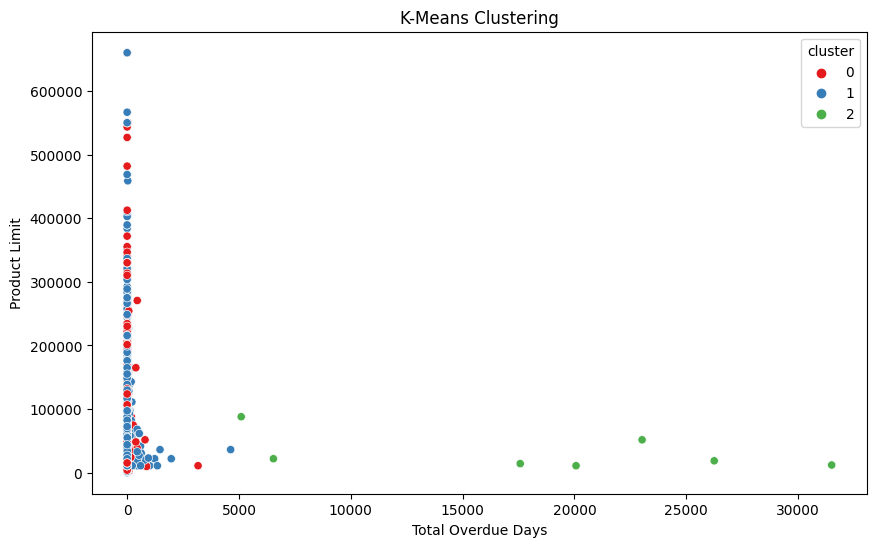

In [59]:
num_clusters = 3


kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_scaled)

data['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x='OVD_sum', y='prod_limit', hue='cluster', data=data, palette='Set1')
plt.title('K-Means Clustering')
plt.xlabel('Total Overdue Days')
plt.ylabel('Product Limit')
plt.show()








In [60]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report


In [61]:
features = ['OVD_t1', 'OVD_t2', 'OVD_t3', 'pay_normal','fea_1', 'fea_3', 'fea_5', 'fea_6', 'fea_7', 'fea_9']
target = 'label'

In [62]:
df2 = pd.read_csv('/content/payment_data.csv')
df1 = pd.read_csv('/content/customer_data.csv')
data = pd.merge(df2, df1, on='id')


In [63]:
data = data.drop(['id', 'update_date', 'report_date'], axis=1)
X = data.drop('label', axis=1)
y = data['label']


In [64]:
data = pd.merge(df2, df1, on='id')

data = data.drop(['id', 'update_date', 'report_date'], axis=1)

data.fillna(0, inplace=True)  # Fill missing values with 0 or use other strategies


X = data.drop('label', axis=1)
y = data['label']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

naive_bayes = GaussianNB()

naive_bayes.fit(X_train_scaled, y_train)

y_pred = naive_bayes.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      1359
           1       0.32      0.07      0.12       291

    accuracy                           0.81      1650
   macro avg       0.57      0.52      0.51      1650
weighted avg       0.74      0.81      0.76      1650



In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

df2 = pd.read_csv('/content/payment_data.csv')
df1 = pd.read_csv('/content/customer_data.csv')
data = pd.merge(df2, df1, on='id')

data = data.drop(['id', 'update_date', 'report_date'], axis=1)

data.fillna(0, inplace=True)  # Replace missing values with 0

X = data.drop('label', axis=1)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


rf_classifier.fit(X_train_scaled, y_train)


y_pred = rf_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1359
           1       1.00      0.69      0.82       291

    accuracy                           0.95      1650
   macro avg       0.97      0.85      0.89      1650
weighted avg       0.95      0.95      0.94      1650

